# Abdallah Dwikat - Computer Engineering - Istanbul Aydin University

# Decision Tree Classification + Logistic Regression
## Classification model with dataset in Nepal studying Earthquake Damage on houses with severe damage or not

# 1) Import Libraries & Load dataset

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from category_encoders import OrdinalEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
import seaborn as sns

## Under sampling and Over Sampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [2]:
df = pd.read_csv(r"C:\Users\hp\Wo...Q\Nepal\Nepal-Earthquack5.csv")
df.head(3)

,b_id,age_building,plinth_area_sq_ft,height_ft_pre_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,superstructure,severe_damage
0,164002,20,560,18,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,"""Stone, mud mortar""",0
1,164081,21,200,12,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,"""Stone, mud mortar""",0
2,164089,18,315,20,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,"""Stone, mud mortar""",0


# 2) Closer look at the target and dataset

### 2.1) Number of classes as 0 (No or Low damage), 1 (Severe damage)

In [13]:
print(df["severe_damage"].value_counts())

severe_damage
1    44732
0    24855
Name: count, dtype: int64


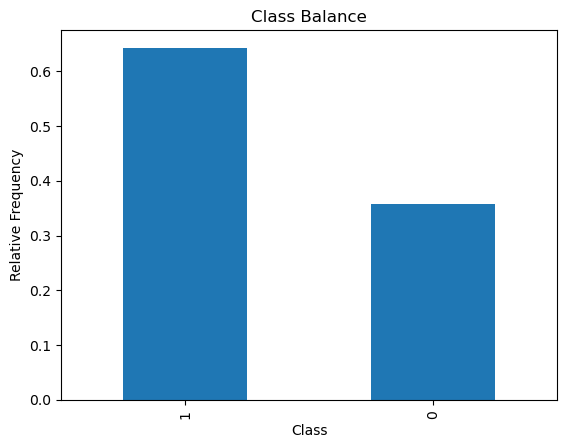

In [15]:
# Plot value counts of `"severe_damage"`
df["severe_damage"].value_counts(normalize=True).plot(
    kind="bar", xlabel="Class", ylabel="Relative Frequency", title="Class Balance"
);

### 2.2) Boxplot shows the distributions of the "height_ft_pre_eq" column for both groups in the "severe_damage" column.

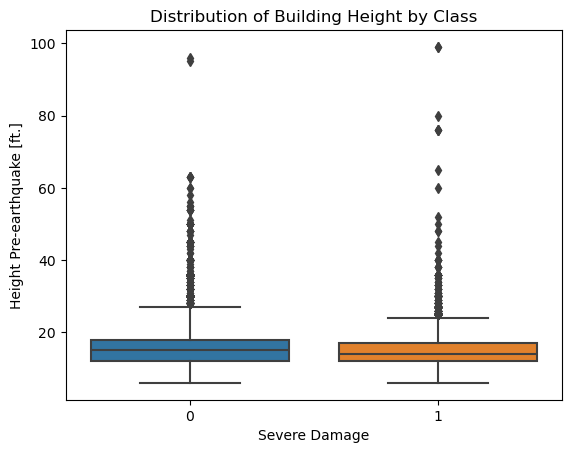

In [20]:
# Create boxplot
sns.boxplot(x="severe_damage", y="height_ft_pre_eq", data=df)
# Label axes
plt.xlabel("Severe Damage")
plt.ylabel("Height Pre-earthquake [ft.]")
plt.title("Distribution of Building Height by Class");

### 2.3) Correlation matrix in heatmap and table

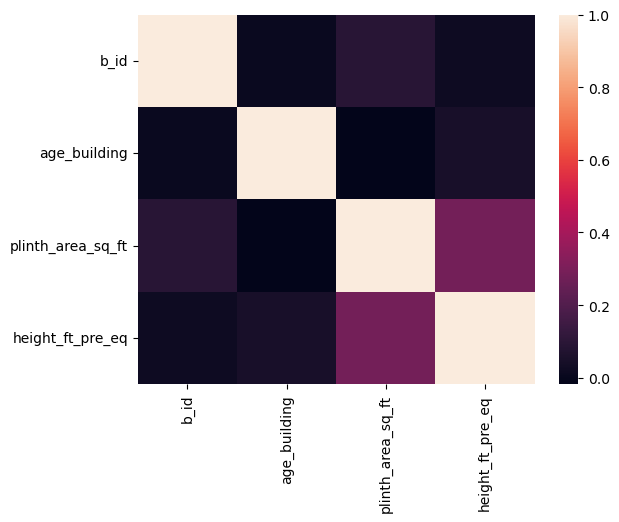

In [22]:
# Create correlation matrix
correlation = df.select_dtypes("number").drop(columns="severe_damage").corr()

# Plot heatmap of `correlation`
sns.heatmap(correlation);

In [23]:
correlation

,b_id,age_building,plinth_area_sq_ft,height_ft_pre_eq
b_id,1.000000,0.009286,0.091130,0.018748
age_building,0.009286,1.000000,-0.017579,0.047159
plinth_area_sq_ft,0.091130,-0.017579,1.000000,0.283661
height_ft_pre_eq,0.018748,0.047159,0.283661,1.000000


# 3) Pivot table & High-Low Cardinality Check

In [29]:
# Create pivot table
foundation_pivot = pd.pivot_table(
    df, index="foundation_type", values="severe_damage", aggfunc=np.mean).sort_values(by="severe_damage") 
foundation_pivot

C:\Users\hp\AppData\Local\Temp\ipykernel_20512\1895403360.py:2: FutureWarning: The provided callable <function mean at 0x00000201EE2EAFC0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  foundation_pivot = pd.pivot_table(


,severe_damage
foundation_type,
RC,0.026061
Bamboo/Timber,0.334837
Cement-Stone/Brick,0.421915
Mud mortar-Stone/Brick,0.687813
Other,0.809129


<Axes: ylabel='foundation_type'>

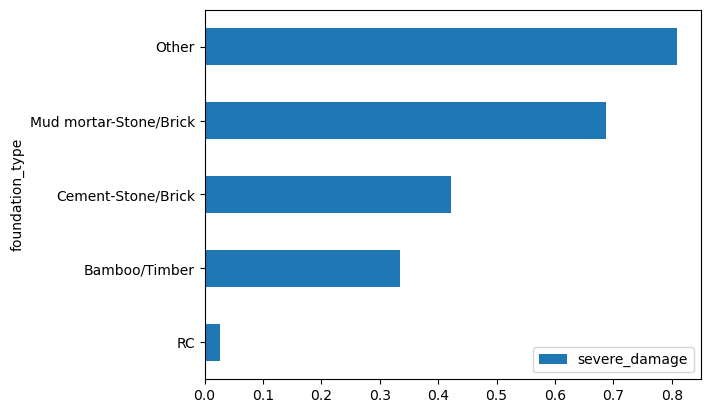

In [33]:
# Plot bar chart of `foundation_pivot`
foundation_pivot.plot(kind="barh")

### Check for high- and low-cardinality categorical features

In [32]:
df.select_dtypes("object").nunique()

land_surface_condition     3
foundation_type            5
roof_type                  3
ground_floor_type          5
other_floor_type           4
position                   4
plan_configuration        10
superstructure            23
dtype: int64

# 4) Split  ( Training / Validation / Testing)

In [34]:
target = "severe_damage"
X = df.drop(columns=target)
y = df[target]

### Train (80%) Test (20%)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Validation (20%) of the Training. which makes (60% Training, 20% Validation, 20% Testing)

In [36]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# 5) Baseline Model

In [37]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.64


# 6) Build Decision Tree Classifier Model

## 6.1)  Hyperparameter to find the best depth for the tree

In [51]:
depth_hyperparams = range(1, 40)
training_acc = []
validation_acc = []
for d in depth_hyperparams:
    model_dt =  make_pipeline(
        OrdinalEncoder(),
        DecisionTreeClassifier(max_depth=d, random_state=42)
    )
    model_dt.fit(X_train, y_train)
    
    # Calculate training accuracy score and append to `training_acc`
    training_acc.append(model_dt.score(X_train, y_train))
    # Calculate validation accuracy score and append to `training_acc`
    validation_acc.append(model_dt.score(X_val, y_val))

print("Training Accuracy Scores:", training_acc[:3])
print("Validation Accuracy Scores:", validation_acc[:3])

Training Accuracy Scores: [0.6895026383743124, 0.700819580105535, 0.7015381160884697]
Validation Accuracy Scores: [0.6981318483923118, 0.7106161307706126, 0.7108855757140291]


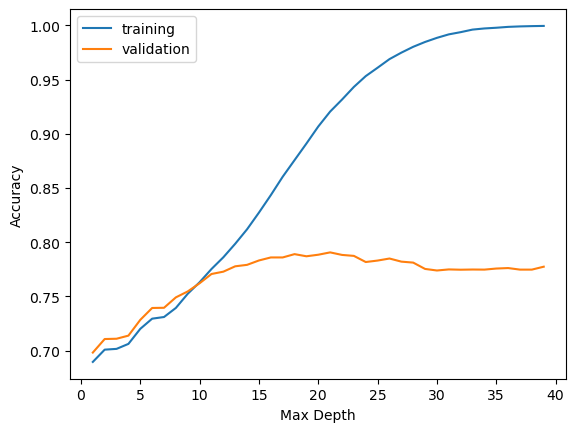

In [52]:
# Plot `depth_hyperparams`, `training_acc`
plt.plot(depth_hyperparams, training_acc, label="training")
plt.plot(depth_hyperparams, validation_acc, label="validation")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend();

#### till around 21 is the best performance

In [53]:
model_dt = make_pipeline(
        OrdinalEncoder(),
        DecisionTreeClassifier(max_depth=21, random_state=42)
    )
model_dt.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['land_surface_condition',
                                      'foundation_type', 'roof_type',
                                      'ground_floor_type', 'other_floor_type',
                                      'position', 'plan_configuration',
                                      'superstructure'],
                                mapping=[{'col': 'land_surface_condition',
                                          'data_type': dtype('O'),
                                          'mapping': Flat              1
Moderate slope    2
Steep slope       3
NaN              -2
dtype: int64},
                                         {'col': 'foundation_type',
                                          'dat...
Stone, 0                    2
Adobe/mud                   3
"RC,  non-engineered"       4
"Stone,  cement mortar"     5
Adobe/mud, 1                6
"Brick,  mud mortar"        7
Timber, 1                   8
"RC,  engineered"           9
"Brick,  cement mortar"    10
Stone, 1                   11
Bamboo, 0                  12
Adobe/mud, 0               13
Other, 0                   14
Timber, 0                  15
Bamboo, 1                  16
Stone                      17
Timber                     18
Other, 1                   19
"Adobe, mud"               20
Other                      21
Bamboo                     22
NaN                        -2
dtype: int64}])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=21, random_state=42))])

## 6.2) Model Performance on Validation and Training

In [55]:
dt_train_acc = model_dt.score(X_train, y_train)
dt_val_acc = model_dt.score(X_val, y_val)

print("Decision Tree, Training Accuracy Score:", dt_train_acc)
print("Decision Tree, Validation Accuracy Score:", dt_val_acc)

Decision Tree, Training Accuracy Score: 0.9204445941394409
Decision Tree, Validation Accuracy Score: 0.7905514639841925


## 6.3) Model Performance on Test and Training

In [56]:
dt_train_acc = model_dt.score(X_train, y_train)
dt_test_acc = model_dt.score(X_test, y_test)

print("Decision Tree, Training Accuracy:", round(dt_train_acc, 2))
print("Decision Tree, Test Accuracy:", round(dt_test_acc, 2))

Decision Tree, Training Accuracy: 0.92
Decision Tree, Test Accuracy: 0.79


# 7) Communication Results for Decision Tree

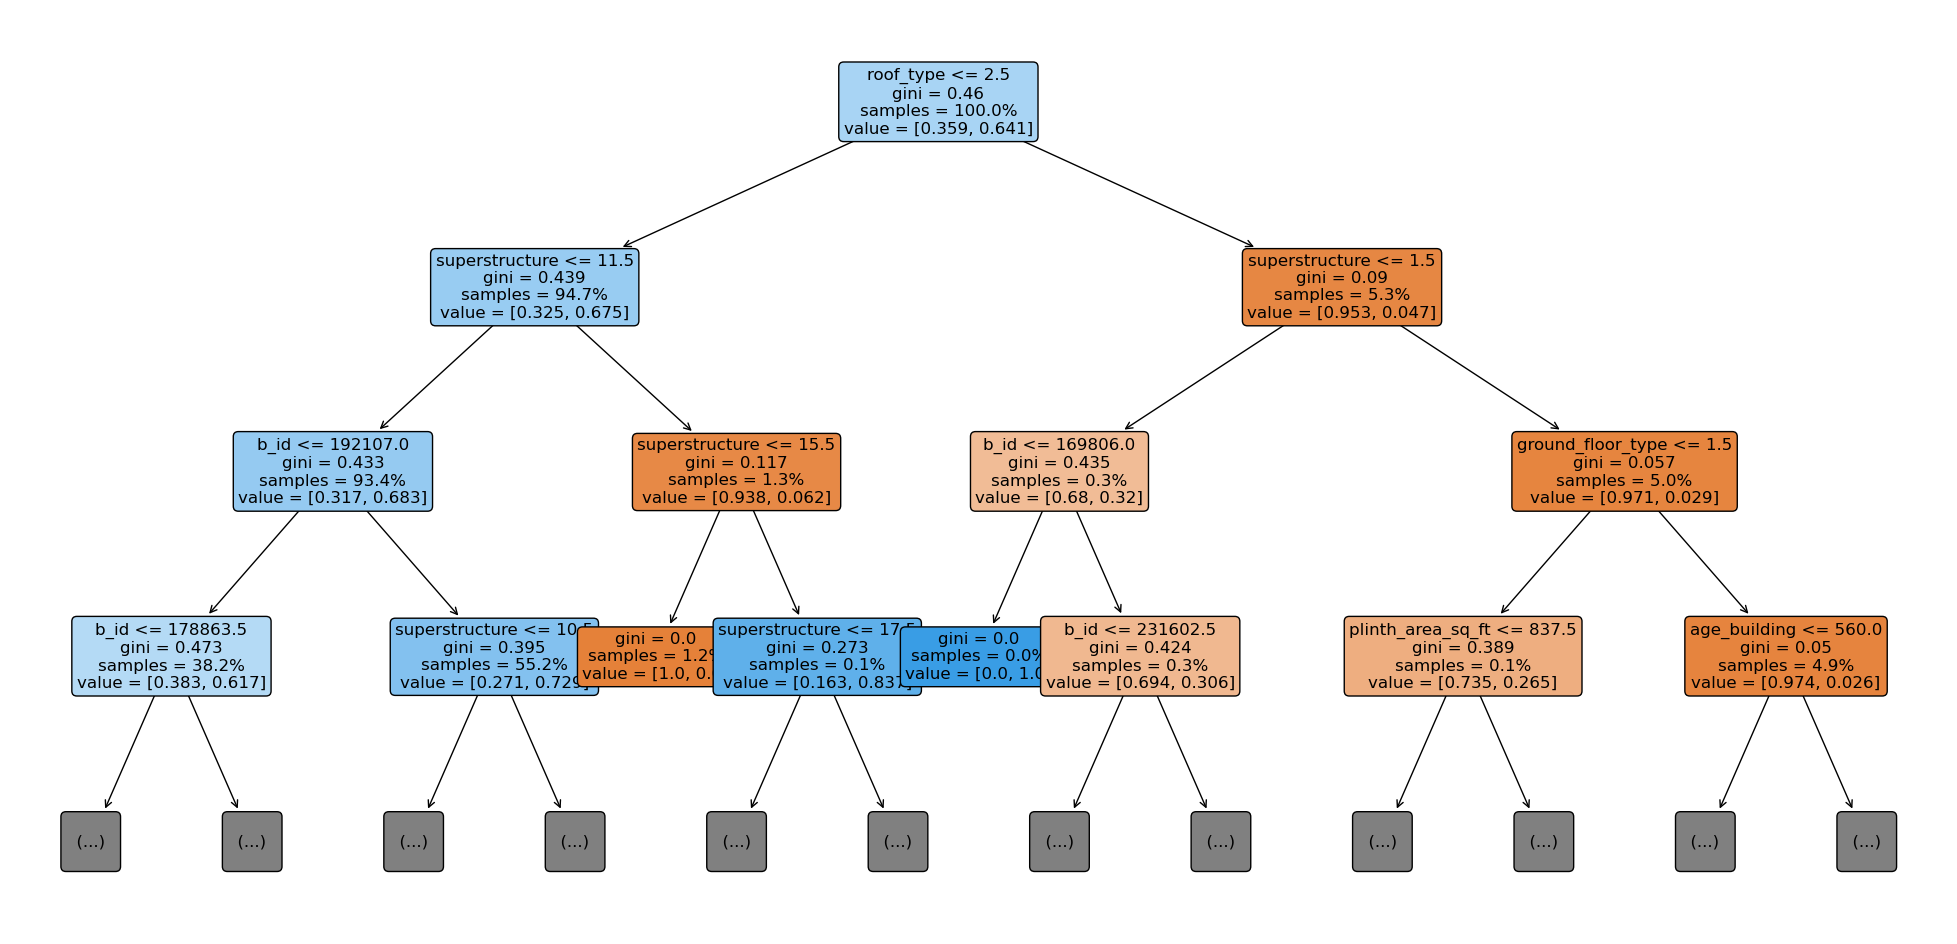

In [63]:
# Create larger figure
fig, ax = plt.subplots(figsize=(25, 12))
# Plot tree
plot_tree(
    decision_tree=model_dt.named_steps["decisiontreeclassifier"],
    feature_names=X_train.columns.to_list(),
    filled=True,  # Color leaf with class
    rounded=True,  # Round leaf edges
    proportion=True,  # Display proportion of classes in leaf
    max_depth=3,  # Only display first 3 levels
    fontsize=12,  # Enlarge font
    ax=ax,  # Place in figure axis
);

### Feature Importance

In [61]:
features1 = model_dt.named_steps["ordinalencoder"].get_feature_names_out()
importances1 = model_dt.named_steps["decisiontreeclassifier"].feature_importances_

# Step 2: Create a Series for feature importances and sort them
feat_imp = pd.Series(importances, index=features).sort_values()

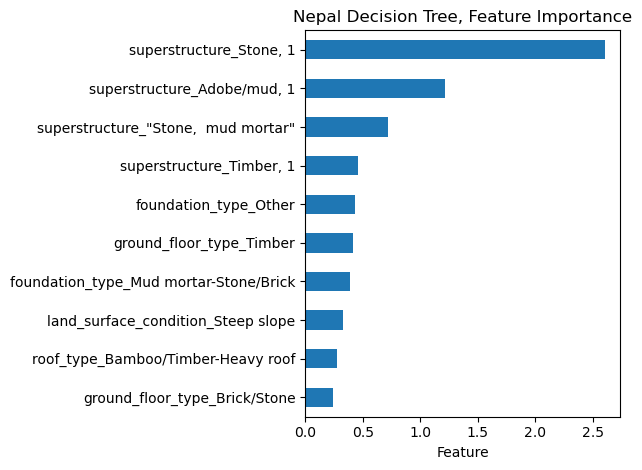

In [62]:
feat_imp.tail(10).plot(kind="barh")
plt.xlabel("Gini Importance")
plt.xlabel("Feature")
plt.title("Nepal Decision Tree, Feature Importance");
plt.tight_layout()

# 8) Build Logistic Regression Model

## 8.1) Hyperparameter (max_iter) 

In [41]:
model_lr = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    LogisticRegression(max_iter=3000)
)
# Fit model to training data
model_lr.fit(X_train, y_train)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['land_surface_condition',
                                     'foundation_type', 'roof_type',
                                     'ground_floor_type', 'other_floor_type',
                                     'position', 'plan_configuration',
                                     'superstructure'],
                               use_cat_names=True)),
                ('logisticregression', LogisticRegression(max_iter=3000))])

## 8.2) Model Performance between Validation and Training dataset

In [42]:
lr_train_acc = model_lr.score(X_train, y_train)
lr_val_acc = model_lr.score(X_val, y_val)

print("Logistic Regression, Training Accuracy Score:", lr_train_acc)
print("Logistic Regression, Validation Accuracy Score:", lr_val_acc)

Logistic Regression, Training Accuracy Score: 0.722151117098911
Logistic Regression, Validation Accuracy Score: 0.7311837614514101


## 8.3) Model Performance between Test set and Training

In [43]:
lr_train_acc = model_lr.score(X_train, y_train)
lr_test_acc = model_lr.score(X_test, y_test)

print("Training Accuracy:", round(lr_train_acc, 2))
print("Test Accuracy:", round(lr_test_acc, 2))

Training Accuracy: 0.72
Test Accuracy: 0.73


# 9) Communication Results for Logistic Regression

### feature Importance

In [44]:
features = model_lr.named_steps["onehotencoder"].get_feature_names()
importances = model_lr.named_steps["logisticregression"].coef_[0]

C:\Users\hp\anaconda3\Lib\site-packages\category_encoders\utils.py:366: FutureWarning: `get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.
  warnings.warn("`get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.",


In [45]:
odds_ratios = pd.Series(np.exp(importances), index=features).sort_values()
odds_ratios.head()

roof_type_RCC/RB/RBC           0.279067
foundation_type_RC             0.286752
superstructure_Stone, 0        0.289793
ground_floor_type_RC           0.294144
superstructure_Adobe/mud, 0    0.363583
dtype: float64

#### 1) 5 larget coefficients

<Axes: >

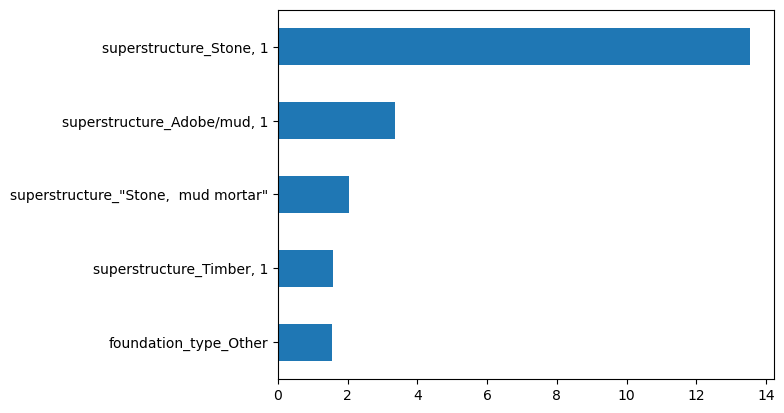

In [46]:
# Horizontal bar chart, five largest coefficients
odds_ratios.tail().plot(kind="barh")

#### 2) 5 Smallest Coefficients

<Axes: >

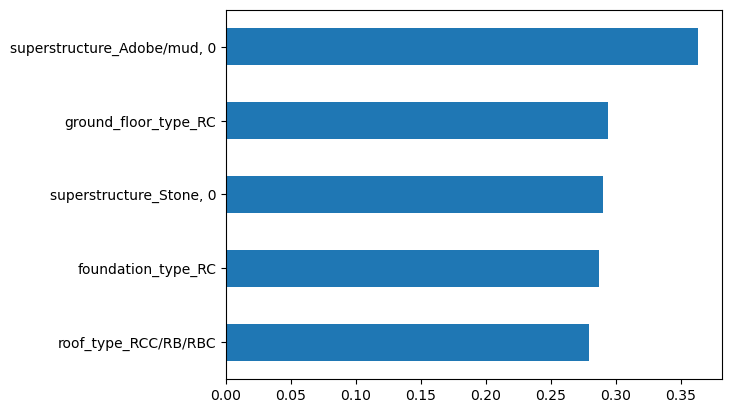

In [47]:
# Horizontal bar chart, five smallest coefficients
odds_ratios.head().plot(kind="barh")

# Abdallah I. J. Dwikat - Computer Engineering - Istanbul Aydin University
## Email: adweikat12@gmail.com 
## Linkedin:  Abdallah Dwikat  www.linkedin.com/in/
abdallah-dwikat-04095927